In [2]:
#setup and merging on cols
import pandas as pd
happiness2015 = pd.read_csv("World_Happiness_2015.csv")
world_dev = pd.read_csv("World_dev.csv")
col_renaming = {'SourceOfMostRecentIncomeAndExpenditureData': 'IESurvey'}

merged = pd.merge(left=happiness2015, right=world_dev, how='left', left_on='Country', right_on='ShortName')
merged = merged.rename(col_renaming, axis=1)

merged


,Country,Region_x,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),...,GovernmentAccountingConcept,ImfDataDisseminationStandard,LatestPopulationCensus,LatestHouseholdSurvey,IESurvey,VitalRegistrationComplete,LatestAgriculturalCensus,LatestIndustrialData,LatestTradeData,LatestWaterWithdrawalData
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2010,NaN,"Expenditure survey/budget survey (ES/BS), 2004",Yes,2008,2010.0,2013.0,2000.0
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Integrated household survey (IHS), 2010",Yes,2010,2005.0,2013.0,2005.0
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income tax registers (ITR), 2010",Yes,2010,2010.0,2013.0,2009.0
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Income survey (IS), 2010",Yes,2010,2010.0,2013.0,2006.0
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,...,Consolidated central government,Special Data Dissemination Standard (SDDS),2011,NaN,"Labor force survey (LFS), 2010",Yes,2011,2011.0,2013.0,1986.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,...,Budgetary central government,General Data Dissemination System (GDDS),2012,"Malaria Indicator Survey (MIS), 2013","Integrated household survey (IHS), 2010/11",NaN,2008,NaN,2013.0,2000.0
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,...,Budgetary central government,General Data Dissemination System (GDDS),2013,"Multiple Indicator Cluster Survey (MICS), 2014",Core Welfare Indicator Questionnaire Survey (C...,NaN,2011/12,NaN,2013.0,2001.0
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,...,Consolidated central government,General Data Dissemination System (GDDS),2008,"Malaria Indicator Survey (MIS), 2012",Core Welfare Indicator Questionnaire Survey (C...,NaN,NaN,2010.0,2012.0,2000.0


In [4]:
#Using apply to transform strings
def extract_last_word(element):
    return str(element).split()[-1]

merged['Currency Apply'] = merged['CurrencyUnit'].apply(extract_last_word)
merged['Currency Apply'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Apply, dtype: object

In [5]:
#USEFUL VECTORIZED METHODS TO KNOW
# Method	            Description
# Series.str.split()	Splits each element in the Series.
# Series.str.strip()	Strips whitespace from each string in the Series.
# Series.str.lower()	Converts strings in the Series to lowercase.
# Series.str.upper()	Converts strings in the Series to uppercase.
# Series.str.get()	Retrieves the ith element of each element in the Series.
# Series.str.replace()	Replaces a regex or string in the Series with another string.
# Series.str.cat()	Concatenates strings in a Series.
# Series.str.extract()	Extracts substrings from the Series matching a regex pattern.

# e.g. series.str.methodName()
# #Vectorized method chaining
# merged['CurrencyUnit'].str.upper().str.split() #need to use .str. before each method

merged['Currency Vectorized'] = merged['CurrencyUnit'].str.split().str.get(-1)
merged['Currency Vectorized'].head()

0     franc
1     krona
2     krone
3     krone
4    dollar
Name: Currency Vectorized, dtype: object

In [6]:
#Missing values with vectorized strings
#merged['CurrencyUnit'].isnull().sum() - count sum of null values in a series
def compute_lengths(element):
    if pd.isnull(element):
        pass #Will ignore null values of Nan and not count them as 3
    else:
        return len(str(element))     
    

lengths = merged['CurrencyUnit'].apply(compute_lengths)

value_counts = lengths.value_counts(dropna=False)



In [7]:
#Finding specific words in strings, regex and pandas
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern)

national_accounts.head()

0     NaN
1     NaN
2     NaN
3     NaN
4    True
Name: SpecialNotes, dtype: object

In [8]:
#Continued specific words in strings
pattern = r"[Nn]ational accounts"

national_accounts = merged['SpecialNotes'].str.contains(pattern, na=False)

merged_national_accounts = merged[national_accounts] #note lack of '' due to indexing
print(merged_national_accounts.head())

Country                   Region_x  Happiness Rank  Happiness Score  \
4          Canada              North America               5            7.427   
7          Sweden             Western Europe               8            7.364   
8     New Zealand  Australia and New Zealand               9            7.286   
9       Australia  Australia and New Zealand              10            7.284   
14  United States              North America              15            7.119   

    Standard Error  Economy (GDP per Capita)   Family  \
4          0.03553                   1.32629  1.32261   
7          0.03157                   1.33171  1.28907   
8          0.03371                   1.25018  1.31967   
9          0.04083                   1.33358  1.30923   
14         0.03839                   1.39451  1.24711   

    Health (Life Expectancy)  Freedom  Trust (Government Corruption)  ...  \
4                    0.90563  0.63297                        0.32957  ...   
7                    0.910

In [ ]:
#Regex notes
pattern = r"[0-9]" #range of numbers
#Ranges of letters
pattern1 = r"[a-z]" #lowercase letters
pattern2 = r"[A-Z]" #uppercase letters

#Restrictive
pattern = r"[1-6][a-z][a-z]" #three char substring in column that starts with number between 1-6 and ends with two letters of any kind
#repeating patterns
pattern = r"[1-6][a-z][a-z]" = r"[1-6][a-z]{2}" #{} indicates num of times it repeats


In [11]:
#Extracting substrings of years from a series
pattern =r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In [15]:
#More series extracting of substrings, replacing Nans, expand parameter in extract() - teturns as df
pattern = r"([1-2][0-9]{3})"
years = merged['SpecialNotes'].str.extract(pattern, expand=True)
years

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
153,2006
154,NaN
155,NaN
156,NaN


In [18]:
#Extracting all matches of a pattern from a series, NAMED CAPTURING GROUPS
 
pattern = r"(?P<Years>[1-2][0-9]{3})"
# merged = merged.set_index('Country') - sets Country column as the index

years = merged['IESurvey'].str.extractall(pattern)
value_counts = years['Years'].value_counts()
value_counts


2012    33
2010    28
2011    22
2013    12
2009     8
2008     6
2005     6
2007     4
2004     3
2000     1
2002     1
1992     1
1999     1
1998     1
2006     1
1995     1
2003     1
Name: Years, dtype: int64

In [20]:
#Extracting more than 1 group of patterns
pattern = r"(?P<First_Year>[1-2][0-9]{3})/?(?P<Second_Year>[0-9]{2})?"
years = merged['IESurvey'].str.extractall(pattern)

first_two_year = years['First_Year'].str[0:2] #slice first two digits from first year column

#add first two digits to second year col, since second year contains the last 2 digits only.
years['Second_Year'] = first_two_year + years['Second_Year']

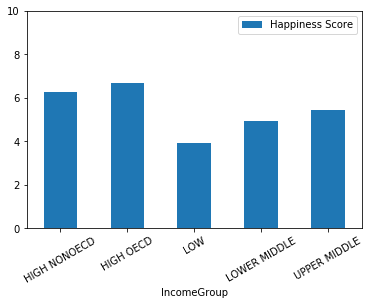

In [23]:
#Finall Summary Challenge:
#Clean a string column, aggregat data, plot the results
#Remove whitespace and income, remove :, all uppercase
merged['IncomeGroup'] = merged['IncomeGroup'].str.replace(' income', '').str.replace(':', '').str.upper()

pv_incomes = merged.pivot_table(index='IncomeGroup', values='Happiness Score')
pv_incomes.plot(kind='bar', rot=30, ylim=(0,10))
                                   
